# The Fibonacci sequence 

$f(n) = f(n-1) + f(n-2); n \ge 1$

0 | 1 | 2 | 3 | 4 | 5 | 6 |  7 |  8 |  9 | 10 
--|---|---|---|---|---|---|----|----|----|----
0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | 21 | 34 | 55 



In [1]:
def fib(n):
    if n <= 1 :
        return n
    return fib(n-1) + fib(n-2)

As see above each call of the `fib()` calls it self twice more. This operation continues until $n \le 1$.   
Thereby;

n  | number of calls
---|-----------------
1  | 1
2  | 3
3  | 5
4  | 9
5  | 15
10 | 177
15 | 1973
20 | 21891
25 | 242785



,number of calls
0,1
1,1
2,3
3,5
4,9
5,15
6,25
7,41
8,67
9,109


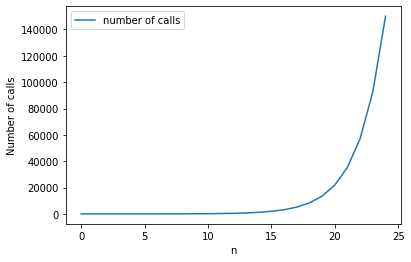

In [2]:
import pandas as pd

c = 0 
def fib_test(n):
    global c
    c += 1 
    if n <= 1 :
        return n
    return fib_test(n-1) + fib_test(n-2)

n_of_call = []
values = []
for i in range(0,25):
    c = 0
    a = fib_test(i)
    # print(i,a, c)
    values.append(a)
    n_of_call.append(c)

number_of_calls = pd.DataFrame({'number of calls': n_of_call})
_ = number_of_calls.plot.line(xlabel="n", ylabel='Number of calls')
number_of_calls

In [3]:
%%timeit
fib(35) 

3.02 s ± 266 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%time fib(30)
%time fib(35)
%time fib(40)

Wall time: 348 ms
Wall time: 3.24 s
Wall time: 31 s


102334155

As seen above the growth is exponential and the gives us $O(n^2)$ and this will also lead in to longer running times as well.

There are many ways we could improve any recursive functions.  


# Memoization

By using memoization we trade storage for time.   

*e.g.*  
`fib(5)` is `5`  
$((0 + 1) + 1) + 3 = 5$  

that could writen as shown:

$fib(5) = fib(4) + \underline{fib(3)}$   
$fib(4) = \underline{fib(3)} + fib(2)$   
$\underline{fib(3)} = fib(2) + fib(1)$   

As you can see the $fib(3)$ is called 2 times, that means that if 
$fib(3)$ is called twice $fib(2)$ & $fib(1)$ is called each time as well.

Now we know that $fib(3) = 2$ and if the software would know that as well, the need to calculate $fib(3)$ is not necessary.

And the same goes for $fib(4)$ that would give us $fib(5) = 3 + 2 = 5$. Just like that we are done, there is no need to calculate the rest of the tree.


In [5]:
## some notes
## Default values in functions work differently in python, making the function above look nicer and more streamlined 

def fib(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n 
    memo[n] = fib(n-1) + fib(n-2)
    return memo[n]

By adding the memo to the function we simple ensured that we run each n only onces.
as seen blow running `fib(100)` takes nanoseconds where the old `fib(40)` toke ~30 seconds    

In [6]:
%%timeit
fib(100)

135 ns ± 13.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [7]:
%%time 
fib(2000)

Wall time: 3 ms


4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125

In [8]:
## in oreder to make the test repeatable memo need to be passed through   
def fib(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n 
    memo[n] = fib(n-1,memo) + fib(n-2,memo)
    return memo[n]

In [9]:
%time fib(1000, memo={})
%time fib(2000, memo={})

Wall time: 1.65 ms
Wall time: 3.45 ms


4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125

as seen above `fib(2000)` takes 3ms

issues 0


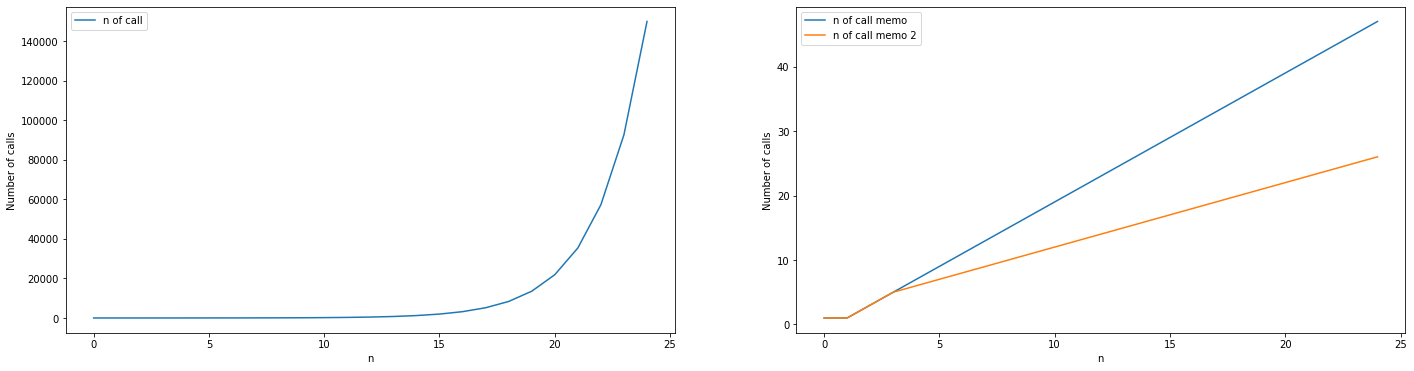

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c = 0 
def fib_test_memo(n, memo={}):
    global c
    c += 1 
    if n in memo:
        return memo[n]
    if n <= 1 :
        return n
    memo[n] = fib_test_memo(n-1, memo) + fib_test_memo(n-2, memo)
    # memo[n] = (memo[n-1] if n-1 in memo else fib_test_memo(n-1, memo)) + (memo[n-2] if n-2 in memo else fib_test_memo(n-2, memo))
    return memo[n]

def fib_test_memo_2(n, memo={}):
    global c
    c += 1 
    if n <= 1 :
        return n
    memo[n] = (memo[n-1] if n-1 in memo else fib_test_memo_2(n-1, memo)) + (memo[n-2] if n-2 in memo else fib_test_memo_2(n-2, memo))
    return memo[n]


values = []
values_memo = []
values_memo_2 = []
n_of_call = []
n_of_call_memo = []
n_of_call_memo_2 = []

for i in range(0,25, 1):
    c = 0
    b = fib_test_memo(i, {})
    n_of_call_memo.append(c)
    values_memo.append(b)

    c = 0
    b = fib_test_memo_2(i, {})
    n_of_call_memo_2.append(c)
    values_memo_2.append(b)


    c = 0
    a = fib_test(i)
    n_of_call.append(c)
    values.append(a)


# number_of_calls["Number of calls memo"] = number_of_calls
number_of_calls = pd.DataFrame({"n of call" : n_of_call, "n of call memo": n_of_call_memo, "n of call memo 2": n_of_call_memo_2})

fig, ax = plt.subplots(1,2)
fig.figure.set_size_inches((24,6))

_ = number_of_calls["n of call"].plot.line(xlabel="n",legend=True, ylabel='Number of calls', ax=ax[0])
_ = number_of_calls[["n of call memo", "n of call memo 2"]].plot.line(xlabel="n", ylabel='Number of calls', ax=ax[1])

print("issues", sum(np.array(values) - np.array(values_memo)))

As seen above the we have gone from an exponential growth to a linear growth.  
Note the subtle difference between  `memo` and `meme_2`. 
In `memo` we always call the two extra methods, however this is clearly not needed and can save 2 extra call.

$$
    memo \rightarrow O(2n)
$$

$$
    memo_2 \rightarrow O(1n)
$$

However in python the syntax in python is not as attractive as in some other languages. 

``` js
memo[n] = (
    memo[n - 1] || fib_memo_g(n - 1) + 
    memo[n - 2] || fib_memo_g(n - 2)
);
```

In [11]:
number_of_calls

,n of call,n of call memo,n of call memo 2
0,1,1,1
1,1,1,1
2,3,3,3
3,5,5,5
4,9,7,6
5,15,9,7
6,25,11,8
7,41,13,9
8,67,15,10
9,109,17,11
